# Gearbox Fault Diagnosis

## Data exploration and visualization

source: https://www.kaggle.com/brjapon/gearbox-fault-diagnosis

### Dataset description (from Kaggle)
**Context**<br>
There are few dataset on mechanical engineering, in particular devoted to apply Machine Learning in industrial environment. This dataset were not yet present in Kaggle. So it's good for the community to have it at hand.
Content

Gearbox Fault Diagnosis Data set include the vibration dataset recorded by using SpectraQuest’s Gearbox Fault Diagnostics Simulator.
Dataset has been recorded using 4 vibration sensors placed in four different direction, and under variation of load from '0' to '90' percent. Two different scenario are included:
1) Healthy condition and
2) Broken Tooth Condition
There are 20 files in total, 10 for healthy gearbox and 10 from broken one. Each file corresponds to a given load from 0% to 90% in steps of 10%.

**Acknowledgements**<br>
Dataset taken from https://openei.org/datasets/dataset/gearbox-fault-diagnosis-data


**Inspiration**<br>
Learn the basics for applying Machine Learning to Predictive Maintenance in industrial facilities

### Additional remarks (tyllukasz)
There was no information about speed of the shaft and sample rate of measurements. **Sample rate = 1000 Hz** (1 sample/1 ms) was assumed to be able to encode real values of frequencies.

### RAW Data (time domain)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#RAW data (in time domain)
raw_df = pd.read_csv('Processed_data_local/data_merged_no_fft.csv')
raw_df = raw_df.drop('Unnamed: 0',axis=1)

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021119 entries, 0 to 2021118
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   a1       float64
 1   a2       float64
 2   a3       float64
 3   a4       float64
 4   load     int64  
 5   failure  int64  
dtypes: float64(4), int64(2)
memory usage: 92.5 MB


- **a1, a2, a3, a4:** values from sensors
- **load:** 0 -> 0%, 10 -> 10% ... 90 -> 90%
- **failure:** 0 - healthy, 1 - broken

In [4]:
raw_df.head()

a1         a2       a3        a4  load  failure
0  -3.908160   0.032071 -1.09934  4.327950    50        0
1  -1.097430 -12.528500  1.14943 -5.023320     0        0
2   3.163500   3.039890 -1.81296 -2.172340    10        0
3  12.807400  -0.594837  1.97009 -1.335710    90        0
4  -0.037101  -5.327090  6.81424 -0.374183    30        1

In [5]:
temp_df = raw_df[:2000] #temporary data frame for time saving when pair plot generating

In [6]:
raw_df.corr()

a1        a2        a3        a4      load   failure
a1       1.000000 -0.133958 -0.031938  0.029242  0.000643 -0.000384
a2      -0.133958  1.000000 -0.235082  0.278087 -0.000267  0.000332
a3      -0.031938 -0.235082  1.000000 -0.086522  0.001217 -0.000934
a4       0.029242  0.278087 -0.086522  1.000000  0.000991  0.000162
load     0.000643 -0.000267  0.001217  0.000991  1.000000 -0.005784
failure -0.000384  0.000332 -0.000934  0.000162 -0.005784  1.000000

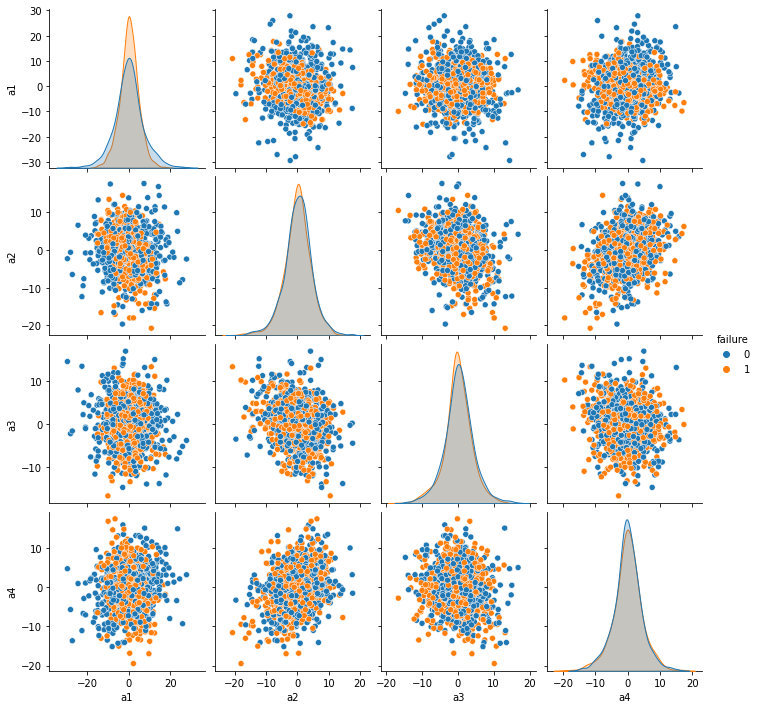

In [7]:
sns.pairplot(data=temp_df,hue='failure',x_vars = ['a1','a2', 'a3','a4'],
            y_vars = ['a1','a2', 'a3','a4'])

**There is no really visible difference in values distribution when gear box is broken or not.
Simple logistic regression model was performed with these data (time domain). Results were not satisfactory. It was almost random guessing.**

### Processed data (frequency domain)

In [8]:
#processed data
df = pd.read_csv('Processed_data/processed_and_shuffled_df.csv')
df = df.drop('Unnamed: 0',axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15789 entries, 0 to 15788
Columns: 262 entries, a1_freq_0 to failure
dtypes: float64(262)
memory usage: 31.6 MB


### Columns encoding

- **a [ i ] _ freq _ [ j ]**
- **i (1,2,3,4) - number of sensor**
- **j (0,1,2 ... 64) - number of frequency (acc buffer size and time step)**

In [10]:
df.head()

a1_freq_0  a1_freq_1  a1_freq_2  a1_freq_3  a1_freq_4  a1_freq_5  \
0   0.005101   1.247122   0.478911   0.137187   0.416799   0.452218   
1   0.101887   1.300294   0.460277   0.508689   0.066402   0.143962   
2   0.114595   0.608045   1.544988   0.133156   0.399378   0.552593   
3   0.074220   0.706798   0.453239   0.093307   0.521446   0.532933   
4   0.169813   0.532547   0.877946   0.620596   0.767804   0.900650   

   a1_freq_6  a1_freq_7  a1_freq_8  a1_freq_9  ...  a4_freq_57  a4_freq_58  \
0   0.648994   0.428732   1.025357   2.115164  ...    0.235110    1.070931   
1   0.102928   0.252416   0.741350   0.906638  ...    0.239470    0.093433   
2   0.395670   0.383603   0.169256   0.211019  ...    0.073918    0.184883   
3   0.570955   0.428299   0.440809   2.020705  ...    0.356629    0.291972   
4   0.397537   1.248088   1.579174   2.711628  ...    0.235135    0.311891   

   a4_freq_59  a4_freq_60  a4_freq_61  a4_freq_62  a4_freq_63  a4_freq_64  \
0    0.276280    0.662413    0.597808    0.308686    0.246427    0.208248   
1    0.587990    0.170224    0.251937    0.194196    0.091358    0.172850   
2    0.054254    0.379204    0.365445    0.113719    0.064615    0.119418   
3    0.537028    0.367629    0.229246    0.136271    0.173111    0.175452   
4    0.202014    0.393056    0.180624    0.110899    0.046682    0.126975   

   load  failure  
0   9.0      0.0  
1   6.0      0.0  
2   1.0      0.0  
3   2.0      1.0  
4   8.0      1.0  

[5 rows x 262 columns]

In [11]:
temp_df2 = df[:2000]

In [12]:
pair_x = ['a1_freq_10','a1_freq_20', 'a1_freq_37','a4_freq_60']
pair_y = ['a1_freq_38','a2_freq_38', 'a3_freq_38','a4_freq_38']

#sns.pairplot(data=temp_df2, hue='failure', x_vars = pair_y, y_vars = pair_y)

### Preprocessing
For every sensor we have amplitudes of 65 different frequecies (4 x 65 = 265 features). For visualisation purpose these frequencies were grouped in 3 frequency ranges - to make pair plot more clear and catch general trend (then for every sensor we have only 3 values instead od 65).<br>

**sample rate = 1000 Hz**<br>
**time step = 1 / sample rate = 0.001 s**<br>
**buffer size = 128 samples**<br>
**frequency step = sample rate / buffer size = 7.8 Hz**<br><br>

- Range 1: 0 to 19 samples **(0 - 148.4 Hz)**
- Range 2: 20 to 39 samples **(156.3 - 304.7 Hz)**
- Range 3: 40 to 64 samples **(312.5 - 500 Hz)**



In [13]:
my_cols = ['a1_freq_range_1','a1_freq_range_2','a1_freq_range_3',
           'a2_freq_range_1','a2_freq_range_2','a2_freq_range_3',
           'a3_freq_range_1','a3_freq_range_2','a3_freq_range_3',
           'a4_freq_range_1','a4_freq_range_2','a4_freq_range_3',]

df[my_cols] = 0

In [14]:
for i in range(0,len(df)):

    #a1 freqency ranges
    df['a1_freq_range_1'][i] = df.iloc[i,0:20].mean()
    df['a1_freq_range_2'][i] = df.iloc[i,20:40].mean()
    df['a1_freq_range_3'][i] = df.iloc[i,40:65].mean()
    
    
    #a2 frequency ranges
    df['a2_freq_range_1'][i] = df.iloc[i,65:85].mean()
    df['a2_freq_range_2'][i] = df.iloc[i,85:105].mean()
    df['a2_freq_range_3'][i] = df.iloc[i,105:130].mean()
    
    #a3 frequency ranges
    df['a3_freq_range_1'][i] = df.iloc[i,130:150].mean()
    df['a3_freq_range_2'][i] = df.iloc[i,150:170].mean()
    df['a3_freq_range_3'][i] = df.iloc[i,170:195].mean()
    
    #a4 frequency ranges
    df['a4_freq_range_1'][i] = df.iloc[i,195:215].mean()
    df['a4_freq_range_2'][i] = df.iloc[i,215:235].mean()
    df['a4_freq_range_3'][i] = df.iloc[i,235:260].mean()

In [15]:
df.head()

a1_freq_0  a1_freq_1  a1_freq_2  a1_freq_3  a1_freq_4  a1_freq_5  \
0   0.005101   1.247122   0.478911   0.137187   0.416799   0.452218   
1   0.101887   1.300294   0.460277   0.508689   0.066402   0.143962   
2   0.114595   0.608045   1.544988   0.133156   0.399378   0.552593   
3   0.074220   0.706798   0.453239   0.093307   0.521446   0.532933   
4   0.169813   0.532547   0.877946   0.620596   0.767804   0.900650   

   a1_freq_6  a1_freq_7  a1_freq_8  a1_freq_9  ...  a1_freq_range_3  \
0   0.648994   0.428732   1.025357   2.115164  ...         0.521172   
1   0.102928   0.252416   0.741350   0.906638  ...         0.723887   
2   0.395670   0.383603   0.169256   0.211019  ...         0.382075   
3   0.570955   0.428299   0.440809   2.020705  ...         0.711359   
4   0.397537   1.248088   1.579174   2.711628  ...         0.421335   

   a2_freq_range_1  a2_freq_range_2  a2_freq_range_3  a3_freq_range_1  \
0         0.778448         0.274500         0.391685         0.762681   
1         0.659409         0.397402         0.472823         0.784494   
2         0.614122         0.270540         0.461992         0.430033   
3         0.804095         1.100987         0.120729         0.659199   
4         1.164646         0.850471         0.445313         0.834720   

   a3_freq_range_2  a3_freq_range_3  a4_freq_range_1  a4_freq_range_2  \
0         0.548651         0.251593         1.098004         0.498882   
1         0.595510         0.342402         0.797080         0.773182   
2         0.424935         0.236863         0.501665         0.405551   
3         0.839905         0.396579         0.711207         0.789532   
4         0.821413         0.334721         0.648771         0.957364   

   a4_freq_range_3  
0         0.397391  
1         0.307386  
2         0.281115  
3         0.491560  
4         0.338024  

[5 rows x 274 columns]

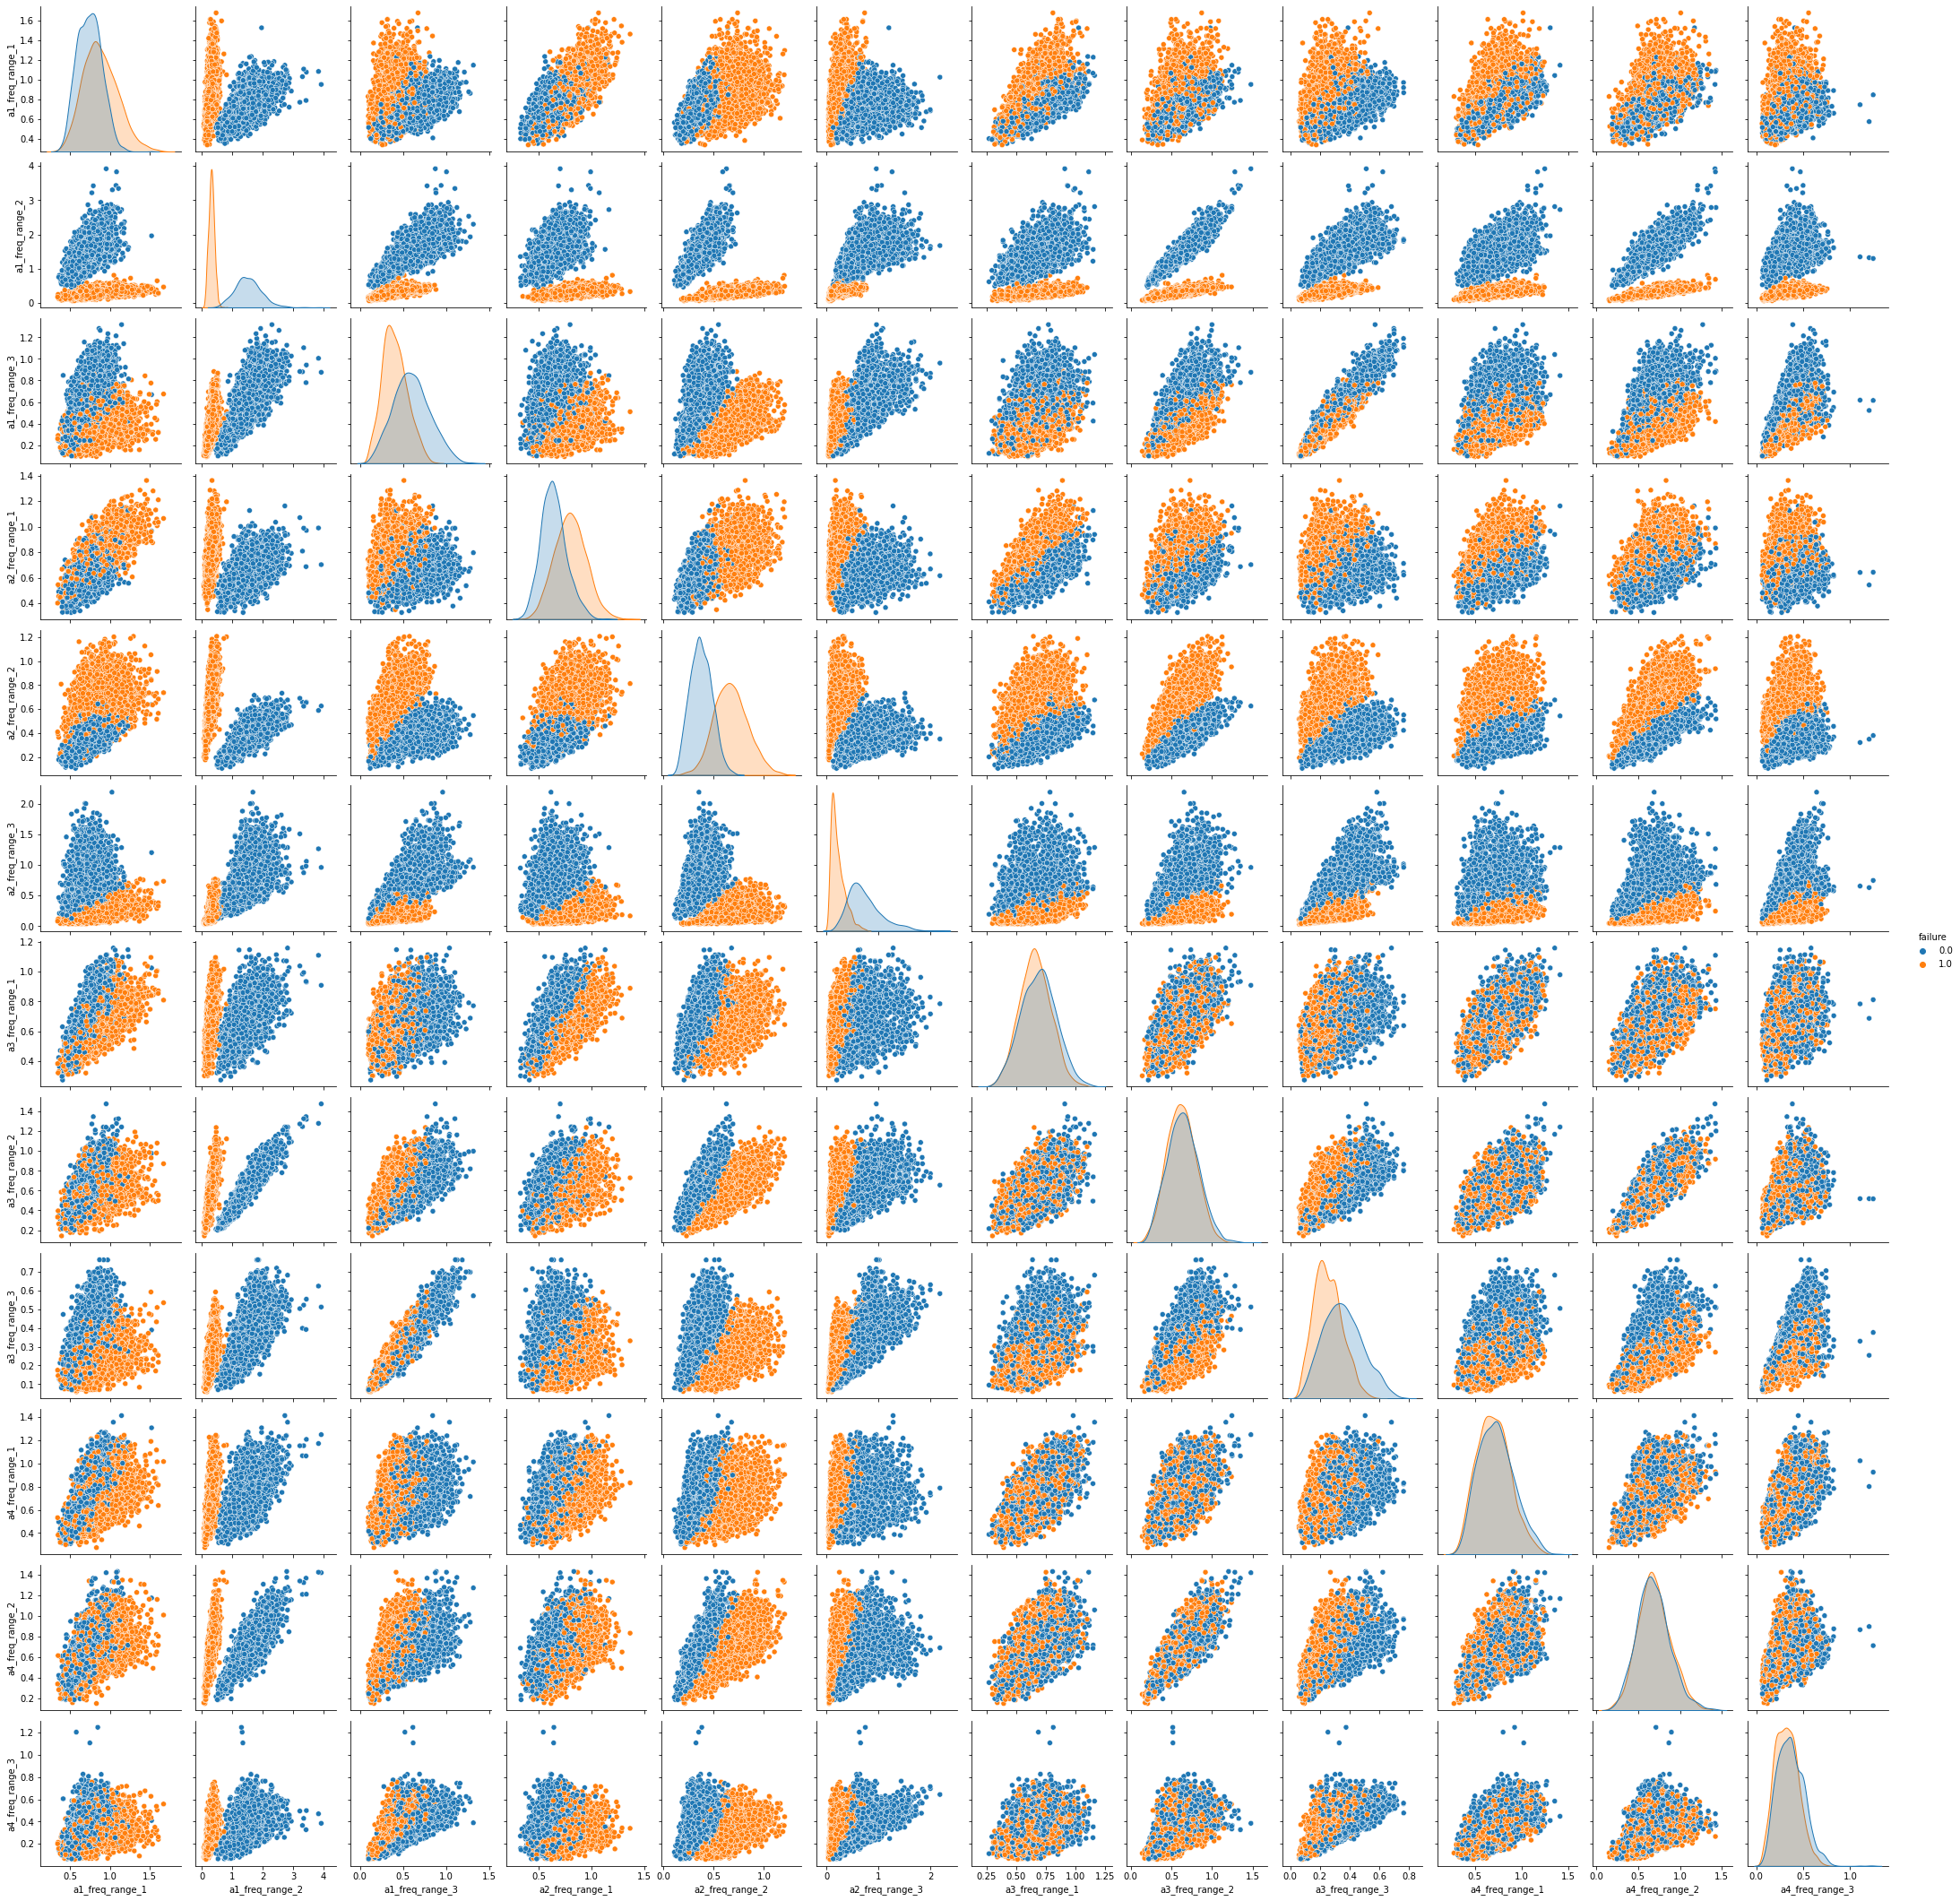

In [16]:
temp_df = df[:5000]
sns.pairplot(data=temp_df, hue='failure', x_vars = my_cols, y_vars = my_cols)

We can observe in the picture above clear split in distribution of some frequencies depending on gear box condition (broken or healthy)

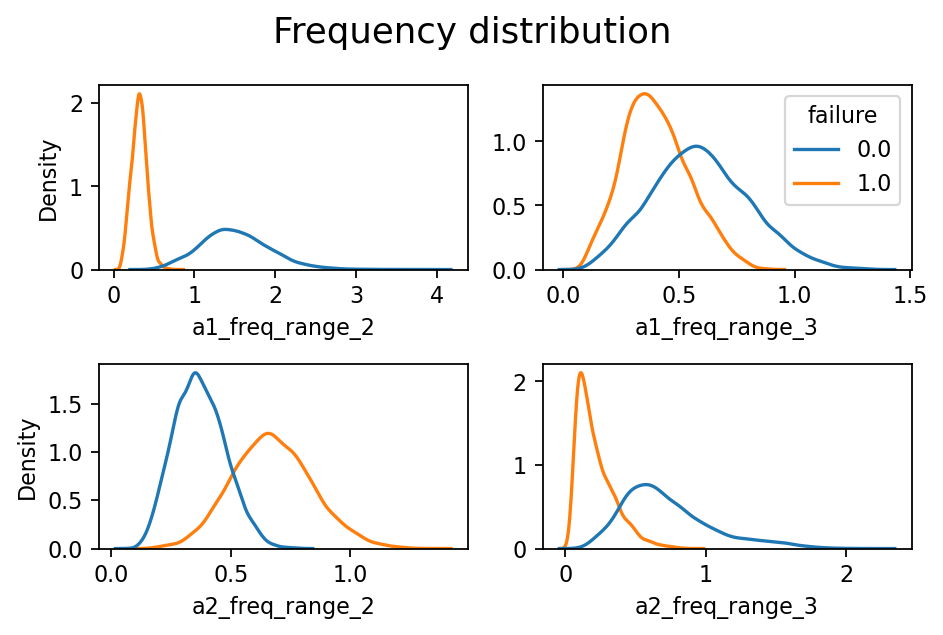

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=2,dpi=160)

fig.suptitle('Frequency distribution',fontsize=16)


l1 = sns.kdeplot(ax=axes[0,0],data=df,x=df['a1_freq_range_2'],hue='failure',legend=False)

l2 = sns.kdeplot(ax=axes[0,1],data=df,x=df['a1_freq_range_3'],hue='failure',legend=True)
axes[0,1].set_ylabel('')

l3 = sns.kdeplot(ax=axes[1,0],data=df,x=df['a2_freq_range_2'],hue='failure',legend=False)

l4 = sns.kdeplot(ax=axes[1,1],data=df,x=df['a2_freq_range_3'],hue='failure',legend=False)
axes[1,1].set_ylabel('')


plt.tight_layout()

In [20]:
temp_df_h = df[df['failure'] == 0]
temp_df_b = df[df['failure'] == 1]

mean_a1_2_healthy = temp_df_h['a1_freq_range_2'].mean()
mean_a1_2_broken = temp_df_b['a1_freq_range_2'].mean()

mean_a1_3_healthy = temp_df_h['a1_freq_range_3'].mean()
mean_a1_3_broken = temp_df_b['a1_freq_range_3'].mean()

mean_a2_2_healthy = temp_df_h['a2_freq_range_2'].mean()
mean_a2_2_broken = temp_df_b['a2_freq_range_2'].mean()

mean_a2_3_healthy = temp_df_h['a2_freq_range_3'].mean()
mean_a2_3_broken = temp_df_b['a2_freq_range_3'].mean()

In [30]:
print(f'Sensor a1, range 156-305 Hz: amplitude healthy = {round(mean_a1_2_healthy,2)} vs broken = {round(mean_a1_2_broken,2)}')
print(f'Sensor a1, range 313-500 Hz: amplitude healthy = {round(mean_a1_3_healthy,2)} vs broken = {round(mean_a1_3_broken,2)}')

print(f'Sensor a2, range 156-305 Hz: amplitude healthy = {round(mean_a2_2_healthy,2)} vs broken = {round(mean_a2_2_broken,2)}')
print(f'Sensor a2, range 313-500 Hz: amplitude healthy = {round(mean_a2_3_healthy,2)} vs broken = {round(mean_a2_3_broken,2)}')

Sensor a1, range 156-305 Hz: amplitude healthy = 1.51 vs broken = 0.32
Sensor a1, range 313-500 Hz: amplitude healthy = 0.59 vs broken = 0.4
Sensor a2, range 156-305 Hz: amplitude healthy = 0.37 vs broken = 0.67
Sensor a2, range 313-500 Hz: amplitude healthy = 0.72 vs broken = 0.22


**We can observe that:**<br>
- in 4/12 cases we have bigger amplitude for healthy gear box
- in 2/12 cases we have bigger amplitude for broken gear box
- in 6/12 cases we do not see big difference between broken and healthy gear box


Deeper investigation should be done (some missing data also needed) to explain in details these behaviour.